In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('../../ficheros/dataframe_estudio.csv', index_col = 0)
df.shape

(2297, 10)

In [16]:
df.head(2)

,country,current_role,yearly_compensation,programming_languages,ides,visualization,activities,gender,primary_tool,ages
16,Belgium,Data Analyst,"2,000-2,999","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,Man,"Local development environments (RStudio, Jupyt...",middle
32,United States of America,Data Analyst,unknown,R,RStudio,Ggplot / ggplot2,unknown,Nonbinary,unknown,younger


# ¿Está Adalab enseñando los lenguajes de programación adecuados?

## Limpieza

In [17]:
df['programming_languages'].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       ' SQL, C++', ' R, SQL, C++', ' SQL', 'Python, SQL, C, Javascript',
       'Python, SQL, C++, Other', 'Python, R, SQL', ' C++',
       'Python, R, Other', 'Python, SQL, Other',
       'Python, SQL, Java, Javascript', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'unknown', 'Python, SQL, MATLAB', 'Python, Javascript',
       'Python, R', 'Python, SQL, Javascript, Bash', ' C, C++, MATLAB',
       'Python, Java', 'Python, R, SQL, Other',
       'Python, C++, Java, MATLAB', 'Python, R, SQL, Javascript', ' None',
       'Python, C', 'Python, SQL, C, Java', 'Python, R, SQL, Java',
       'Python, SQL, C', 'Python, C, C++, Java', ' R, Other',
       'Python, SQL, MATLAB, Other', 'Python, R, C, C++', ' SQL, Other',
       'Python, SQL, Java', 'Python, R, SQL, C', 'Python, C, MATLAB',
       'Python, R, SQL, C, C++, Java, Javascript', 'Py

In [18]:
def crear_filas(df,patron,columna):
    """
    Esta función divide la respuesta de cada individuo separándola por comas y crea 1 fila por cada separación
    Args: 
    df(df):dataframe sobre el que queremos aplicar los cambios
    patron(string): es el patron por el que nuestra función nos va a hacer la separación
    columna(string): es el nombre de la columna sobre la que queremos aplicar nuestra función
    """
    
    df[columna] = df[columna].str.split(patron, n = -1) 
    
    return df.explode(columna)

In [19]:
df = crear_filas(df, ',', 'programming_languages')

In [20]:
df['programming_languages'].unique()

array(['Python', ' SQL', ' R', ' C', ' C++', ' Java', ' Javascript',
       ' MATLAB', ' Other', 'unknown', ' Bash', ' None', ' Julia',
       ' Swift'], dtype=object)

In [21]:
def limpieza(elemento):
    """
    Esta función nos permite eliminar los espacios que hay al principio y al final de los strings 
    Args: elementos
    elemento(string): es el dato al que le queremos quitar los espacios 
    """
    try:
        return elemento.strip()
         
    except:
        return elemento

In [22]:
df['programming_languages'] = df['programming_languages'].apply(limpieza)
df['programming_languages'].unique()

array(['Python', 'SQL', 'R', 'C', 'C++', 'Java', 'Javascript', 'MATLAB',
       'Other', 'unknown', 'Bash', 'None', 'Julia', 'Swift'], dtype=object)

## Visualización

In [23]:
ordenado = df['programming_languages'].value_counts().sort_values(ascending = False).head()
ordenado_desc = pd.DataFrame(ordenado).reset_index()

In [24]:
ordenado_desc

,index,programming_languages
0,Python,1803
1,SQL,1398
2,R,715
3,Javascript,229
4,Java,214


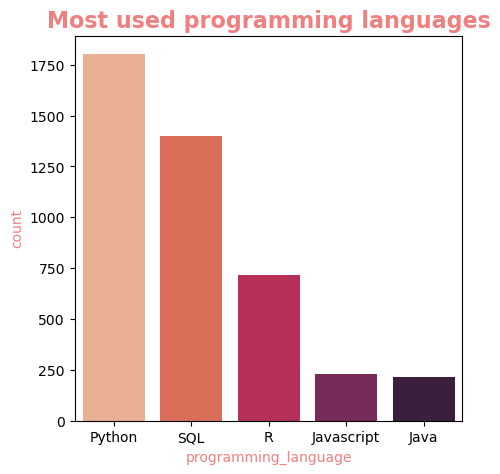

In [55]:
plt.figure(figsize =(5,5))
sns.barplot(y = "programming_languages", x = "index", data = ordenado_desc, palette= "rocket_r");
plt.title("Most used programming languages", color = "lightcoral", fontweight='bold', fontsize = 16);
plt.xlabel("programming_language", color = "lightcoral");
plt.ylabel("count", color = "lightcoral");

## Conclusiones

Como podemos observar, los datos muestran que los lenguajes de programación más utilizados por un Data Analyst son Python y SQL. 

- Python es un lenguaje que permite realizar un análisis sobre grandes conjuntos de datos. Además, para analizar datos se requiere de un proceso de limpieza y exploración que, gracias a las bibliotecas de Python, resulta sencillo ya que permiten trabajar con los diferentes conjuntos de datos de forma rápida y sencilla. Además, python hace que sea posible trabajar con los datos que están en archivos de diferentes formatos como por ejemplo 'JSON', ''CSV', 'PICKLE' o 'HTML'. Python incluso permite realizar visualizaciones a través de librerías como Seaborn o Matplotlib y facilitar de esta forma la interpretación de los datos. Es, como vemos, un lenguaje muy versátil.

- SQL permite al analista de datos acceder a los datos almacenados en bases de datos relacionales y hacerlo de forma rápida y efectiva incluso en grandes volúmenes de datos. Además, se pueden realizar consultas personalizadas y complejas además de combinar múltiples tablas, filtrar datos o realizar cálculos. 

En resumen, Adalab está actualizado con los lenguajes de programación más utilizados en el día a día de un Data Analytics.